**Case Study on Regression**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
from google.colab import files
 
 
uploaded = files.upload()

Saving car_age_price.csv to car_age_price.csv


Data understanding 


In [5]:
data = pd.read_csv('car_age_price.csv')

In [6]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [7]:
data.shape

(112, 2)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [9]:
data.dtypes

Year     int64
Price    int64
dtype: object

In [10]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


Exploration

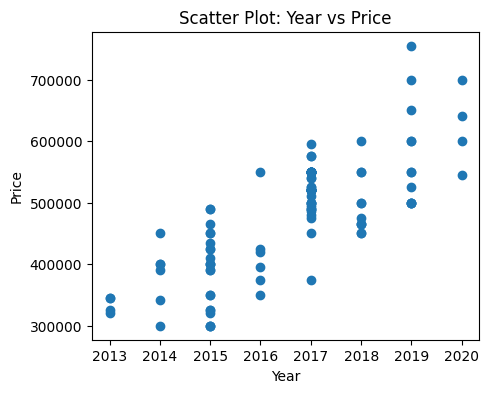

In [11]:
plt.figure(figsize=(5, 4))  # Set the figure size
plt.scatter(data['Year'], data['Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Scatter Plot: Year vs Price')
plt.show()

data cleaning 

In [12]:
data.isna().sum()

Year     0
Price    0
dtype: int64

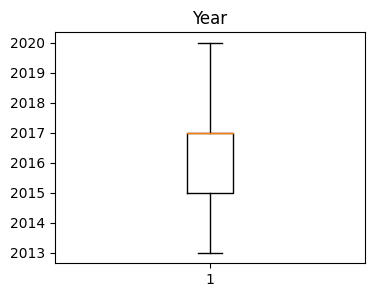

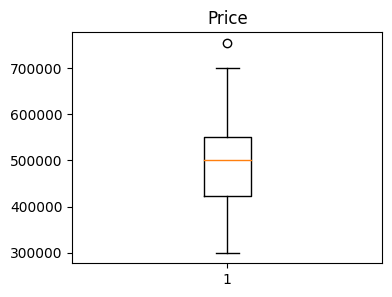

In [14]:
# Check for outliers

num_cols = ['Year', 'Price']

for i in num_cols:
    plt.figure(figsize=(4,3))
    plt.boxplot(data[i])
    plt.title(i)

Data visualization

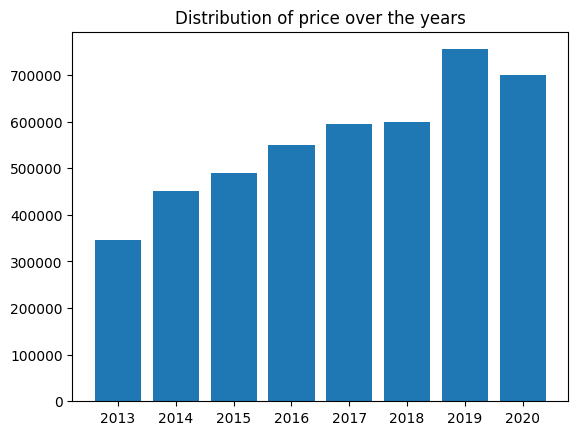

In [15]:
plt.bar(data['Year'],data['Price'])
plt.title('Distribution of price over the years')
plt.show()

Encoding and Scaling

                

                     not needed in this dataset

Creating the model

<Axes: >

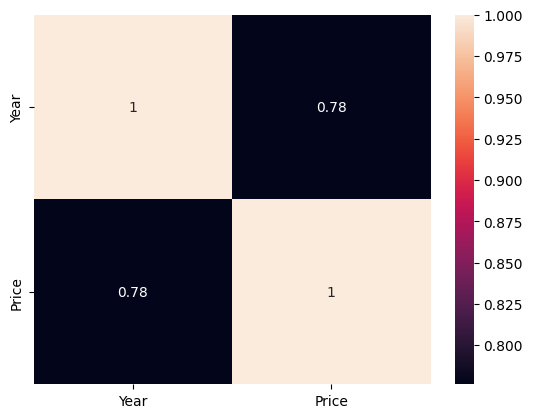

In [16]:
corrmatrix = data.corr()
sns.heatmap(corrmatrix,annot=True)

 Linear Regression model

In [17]:
y = data['Price'] 
x = data.drop(['Price'],axis=1) 

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
x_train,x_test

(     Year
 81   2014
 77   2015
 15   2017
 30   2019
 45   2018
 ..    ...
 106  2015
 14   2017
 92   2017
 51   2018
 102  2015
 
 [84 rows x 1 columns],
      Year
 40   2019
 65   2017
 4    2018
 47   2018
 42   2018
 69   2015
 26   2017
 11   2018
 10   2019
 44   2019
 73   2013
 55   2017
 68   2015
 97   2020
 0    2018
 18   2019
 53   2013
 80   2015
 103  2017
 91   2017
 36   2017
 12   2017
 31   2017
 66   2017
 90   2017
 62   2017
 22   2015
 85   2015)

In [19]:
y_train,y_test

(81     390000
 77     325000
 15     500000
 30     650000
 45     450000
         ...  
 106    300000
 14     475000
 92     520000
 51     550000
 102    350000
 Name: Price, Length: 84, dtype: int64,
 40     525000
 65     495000
 4      465000
 47     450000
 42     550000
 69     300000
 26     550000
 11     500000
 10     500000
 44     550000
 73     320000
 55     550000
 68     465000
 97     640000
 0      465000
 18     500000
 53     345000
 80     390000
 103    375000
 91     520000
 36     550000
 12     500000
 31     550000
 66     525000
 90     520000
 62     540000
 22     434999
 85     320000
 Name: Price, dtype: int64)

In [20]:
lr = LinearRegression()   
linear_model = lr.fit(x_train,y_train)

y_pred = linear_model.predict(x_test)
y_pred,y_test

(array([599223.07304104, 505265.04214995, 552244.05759549, 552244.05759549,
        552244.05759549, 411307.01125886, 505265.04214995, 552244.05759549,
        599223.07304104, 599223.07304104, 317348.98036776, 505265.04214995,
        411307.01125886, 646202.08848657, 552244.05759549, 599223.07304104,
        317348.98036776, 411307.01125886, 505265.04214995, 505265.04214995,
        505265.04214995, 505265.04214995, 505265.04214995, 505265.04214995,
        505265.04214995, 505265.04214995, 411307.01125886, 411307.01125886]),
 40     525000
 65     495000
 4      465000
 47     450000
 42     550000
 69     300000
 26     550000
 11     500000
 10     500000
 44     550000
 73     320000
 55     550000
 68     465000
 97     640000
 0      465000
 18     500000
 53     345000
 80     390000
 103    375000
 91     520000
 36     550000
 12     500000
 31     550000
 66     525000
 90     520000
 62     540000
 22     434999
 85     320000
 Name: Price, dtype: int64)

Calcuate model efficiency

In [21]:
from sklearn.metrics import mean_squared_error,r2_score
linear_mse = mean_squared_error(y_test,y_pred)
linear_r2 = r2_score(y_test,y_pred)
print(linear_mse)
print(linear_r2)

3878767151.073449
0.4347961632108023


Lasso Regression Model

In [25]:


l = Lasso()
lasso_model = l.fit(x_train, y_train)
# Make predictions on the test set

y_predict_lasso = lasso_model.predict(x_test)
# Display y_predicted

y_predict_lasso

array([599222.10828854, 505264.87581331, 552243.49205092, 552243.49205092,
       552243.49205092, 411307.64333805, 505264.87581331, 552243.49205092,
       599222.10828854, 599222.10828854, 317350.4108628 , 505264.87581331,
       411307.64333805, 646200.72452617, 552243.49205092, 599222.10828854,
       317350.4108628 , 411307.64333805, 505264.87581331, 505264.87581331,
       505264.87581331, 505264.87581331, 505264.87581331, 505264.87581331,
       505264.87581331, 505264.87581331, 411307.64333805, 411307.64333805])

Calcuate model efficiency

In [26]:
lasso_mse = mean_squared_error(y_test,y_predict_lasso)
lasso_r2 = r2_score(y_test,y_predict_lasso)

print(lasso_mse)
print(lasso_r2)

3878735896.222091
0.4348007175862566


For selecting the best model

In [27]:
if linear_mse<lasso_mse and linear_r2>lasso_r2:
    selected_model=linear_model
    print('Best model: Linear Regression model')
elif lasso_mse<linear_mse and lasso_r2>linear_r2:
    selected_model=lasso_model
    print('Best model: Lasso Regression model')
else:
    print('Both models have similar performance')

Best model: Lasso Regression model


predict the possible price of a 2022 model second-hand grand i10 using lasso regression model

In [ ]:
price = lasso_model.predict([[2022]])

In [29]:
print('The possible price of a 2022 model second-hand grand i10 car: ',price)

The possible price of a 2022 model second-hand grand i10 car:  [740157.95700142]
